# Uvod


V projektni nalogi bom analizirala najbolje ocenjene albume s strani Best Ever Albums. Zajeti podatki, ki jih bom analizirala so naslov, avtor, leto izida, ocena, število ocen in število komentarjev.

Analiza je razdeljena na tri sklope: prvi je analiza s časovnega vidika, drugi je o avtorjih tretji pa se osredotoča na analizo ocen in komentarjev.

In [69]:
import pandas as pd

albumi = pd.read_csv('albumi.csv', index_col='rank')

pd.options.display.max_rows = 20

%matplotlib inline

## Časovni vidik

Zanimivo je opazovati kako se trendi v glasbi spreminjajo skozi čas. Na primer kako se spreminjajo produktivnost avtorjev, kako kakovostna je glasba glede na ocene poslušalcev ter kako zanimiva in popularna je glasba glede na število ocen in komentarjev.

Pred začetkom raziskovanja sem si postavila sledečo hipotezo:
- Število albumov skozi čas narašča, vendar pa je povprečna ocena slabša.

In [11]:
albumi_po_letih = albumi.groupby('leto')

In [81]:
albumi_po_letih.size().sort_values(ascending=[False])

leto
1971    44
1972    39
1970    38
1973    36
2003    31
1969    29
1974    27
2000    26
1994    25
1975    25
        ..
1957     5
1956     4
1964     4
1958     3
1963     3
1960     2
1961     2
1962     1
1955     1
1954     1
Length: 65, dtype: int64

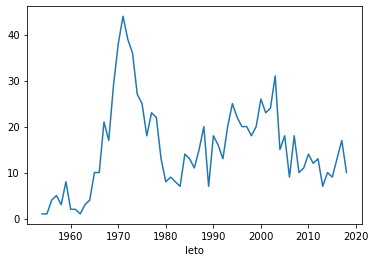

In [7]:
albumi.groupby('leto').size().plot()

Takoj opazimo da so prva 4 najbolj produktivna leta leta od 1970 do 1973. Kot je tudi zelo dobro vidno na grafu, je takrat višek
glede na letno produktivnost. Okoli leta 1980 sledi drastičen upad produktivnosti, potem počasna rast do leta 2003 in spet manjši upad, ki pa je še kar konstanten do danes.

Pravzaprav je prvi del moje hipoteze povsem napačen. Lahko bi rekli da velja med leti 1980 in 2000, vendar pa to še zdaleč ne bi moglo potrditi moje hipoteze.

In [16]:
albumi_po_letih.ocena.mean().sort_values(ascending=[False])

leto
1989    83.857143
1965    83.500000
1963    83.333333
1966    82.900000
1967    82.857143
1968    82.529412
1959    82.500000
1969    82.482759
2016    82.461538
1979    82.461538
          ...    
1964    80.750000
1978    80.681818
1958    80.666667
2009    80.636364
1961    80.500000
1956    80.250000
1982    80.125000
1955    80.000000
1962    80.000000
1954    80.000000
Name: ocena, Length: 65, dtype: float64

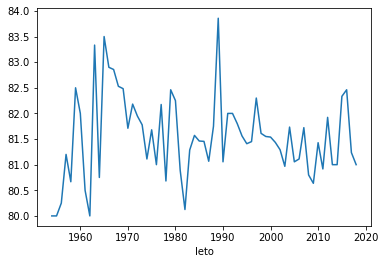

In [9]:
albumi.groupby('leto').ocena.mean().plot()

Kot lahko vidimo je najboljša povprečna ocena za leto 1989 in sicer približno 83.9.
Glede na to, da se ocene analiziranih albumov gibljejo med 80 in 92, to sugestira, da je večina albumov verjetno vseeno ne izstopa in imajo neko povprečno oceno blizu 80.

Opazimo lahko tudi, da naslednjih 5 najboljših povprečnih ocen pripada letom v razponu med 1963 - 1968. Naj najprej pripomnim, da je ta graf veliko manj zgovoren ket prejšnji, saj so nihanja zelo velika. Vendar pa lahko med leti 1960 - 1970 opazimo nekakšen višek glede na povprečno oceno in je najboljša ocena za leto 1989 pravzaprav velika izjema med povprečnimi leti.

Tudi drugi del moje hipoteze ne drži, saj pravzaprav ne moremo razbrati nikakršnega trenda, ki bi potekal skozi celotno opazovano časovno obdobje.

Vendar pa sem pri opazovanju rezultatov prišla do zanimivih ugotovitev. Med leti 1960 in 1970 je opažen višek v kvaliteti, ki pa mu v letih 1970 do 1973 sledi višek v kvantiteti. Lahko bi sklepali, da je kakovost izdanih albumov spodbudila produktivnost v naslednjih letih.

Seveda pa je moj vzorec veliko premajhen, da bi lahko z zagotovostjo kaj potrdili.

## Avtorji

V tem poglavju se bom posvetila analizi avtorjev. Zanimalo me bo predvsem kdo so najuspešnejši avtorji oziroma izvajalci pa tudi kdo med njimi je najbolj produktiven.

In [77]:
albumi[albumi.ocena >= 90]

,naslov,avtor,leto,ocena,st_ocen,st_komentarjev
rank,,,,,,
1.0,The Dark Side Of The Moon,Pink Floyd,1973,92,4132,461
2.0,OK Computer,Radiohead,1997,92,4357,702
3.0,Abbey Road,The Beatles,1969,91,3530,371
4.0,Revolver,The Beatles,1966,91,3558,392
5.0,Wish You Were Here,Pink Floyd,1975,91,3044,242
6.0,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,1967,90,3576,386
7.0,The Rise And Fall Of Ziggy Stardust And The Sp...,David Bowie,1972,90,2636,231
8.0,Led Zeppelin IV,Led Zeppelin,1971,90,3145,240
9.0,To Pimp A Butterfly,Kendrick Lamar,2015,90,1483,281


To so najboljše ocenjeni albumi. Pa poglejmo kakšno lestvico dobimo, če za avtorje vzamemo povprečno oceno vseh njihovih albumov na seznamu:

In [10]:
albumi_po_avtorjih = albumi.groupby('avtor')

In [72]:
albumi_po_avtorjih.ocena.mean().sort_values(ascending=[False]).head(20)

avtor
The Velvet Underground And Nico    89.000000
フィッシュマンズ [Fishmans]                87.000000
Radiohead                          86.375000
Television                         86.000000
Nas                                86.000000
Madvillain                         86.000000
Pink Floyd                         85.111111
Slint                              85.000000
Love                               85.000000
The Zombies                        85.000000
The Strokes                        85.000000
Neutral Milk Hotel                 84.500000
Nick Drake                         84.500000
Godspeed You! Black Emperor        84.333333
Pixies                             84.250000
Bob Dylan                          84.222222
The Beatles                        84.200000
Led Zeppelin                       84.083333
Carlos Kleiber                     84.000000
Weezer                             84.000000
Name: ocena, dtype: float64

To je prvih 20 najbolje ocenjenih avtorjev. Večina povprečnih ocen je lepo zaokroženih, kar sugestira na to, da so rezultat enega ali dveh albumov, ki so dobro ocenjeni. Vendar pa nas to ne moti, saj analiziramo le najbolje ocenjene albume, torej so na seznamu tisti, ki jim je uspelo narediti vsaj en res dober album. Kljub temu pa je nekaj imen, ki izstopajo, saj je očitno, da je ocena rezultat večih albumov.

Pa poglejmo kdo so najproduktivnejši avtorji:

In [71]:
albumi_po_avtorjih.size().sort_values(ascending=[False]).head(20)

avtor
The Beatles                    20
David Bowie                    16
Miles Davis                    13
Led Zeppelin                   12
Grateful Dead                  11
The Smiths                      9
Bob Dylan                       9
Pink Floyd                      9
The Who                         9
Steely Dan                      8
Nick Cave And The Bad Seeds     8
The Rolling Stones              8
Rush                            8
Radiohead                       8
Van Morrison                    7
Talking Heads                   7
Frank Zappa                     7
Simon And Garfunkel             7
Neil Young                      7
Brian Eno                       6
dtype: int64

Vidimo, da so najbolj produktivni The Beatles s 16 albumi, sledi jim David Bowie več kot 10 pa jih imajo še Miles Davis, Led Zeppelin in Greatful Dead.

Vidimo, da se kar nekaj znanih izvajalcev pojavi na kar vseh treh seznamih. Lahko bi predvidevali, da so to le najboljši glasbeniki. 

Seveda pa so to le podatki iz ene od glasbenih strani, kar gotovo ne zagotavlja točnosti podatkov.
Prav tako moramo imeti v mislih, da so to le najbolje ocenjeni albumi, zato je možno, da je kakšen izvajalec bolj produktiven vendar se njegovi albumi niso uvrstili med najboljše.

## Ocene in komentarji

V tem poglavju pa bom preučevala korelacije med ocenami, njihovim številom in številom komentarjev.

Hipoteze:
- Albumi z več ocenami imajo tudi več komentarjev.
- Bolje ocenjeni albumi imajo več ocen in komentarjev.
- Novejši albumi imajo več ocen in komentarjev.

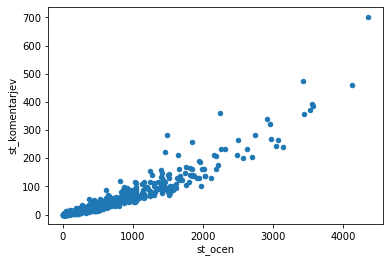

In [26]:
albumi.plot.scatter('st_ocen', 'st_komentarjev')

Na grafu lahko vidimo lepo skoraj linearno korelacijo med številom ocen in številom komentarjev. To pomeni, da je moja hipoteza pravilna.

V nadaljevanju lahko torej gledamo le odvisnost od ene izmed teh spremenljivk.


Pa poglejmo najprej kako so povezane ocene in njihovo število:

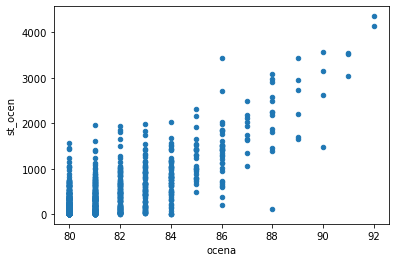

In [37]:
albumi.plot.scatter('ocena', 'st_ocen')

Razsevni diagram očitno ni najboljša izbira za ugotavljanje zveze med ocenami in številom ocen, saj imamo premalo različnih ocen. Kljub temu lahko opazimo nekakšno povezavo, ki bi lahko bila premo sorazmerna recimo linearno ali pa s kvadratom.

Vseeno raje uporabimo stolpični diagram in poglejmo kakšno je povprečno število ocen glede na posamezno oceno:

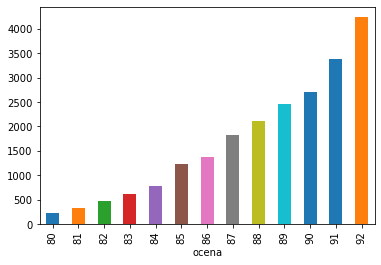

In [70]:
albumi.groupby('ocena').st_ocen.mean().plot.bar()

Ta graf pa nam prikaže lepo povezavo, izgleda da je približno premo sorazmerna s kvadratom. Očitno je, da poslušalci albume, ki so jim bolj ušeč, tudi bolj pogosto ocenjujejo. To tudi potrdi mojo hipotezo, da so bolje ocenjeni albumi bolj popularni med poslušalci, vsaj kar se tiče ocenjevanja in komentiranja.

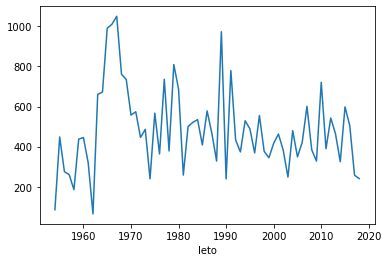

In [35]:
albumi.groupby('leto').st_ocen.mean().plot()

Graf povprečnega števila ocen glede na leta nam pokaže, da angažiranost poslušalcev ni preveč odvisna od leta v katerm je določen album izšel. Pravzaprav v nasprotju z mojo hipotezo izgleda, da več ocenjujejo in komentirajo starejše albume najbolj tiste iz let okoli 1965 do 1970. Verjetno k temu pripomore dejstvo, da je takrat izšlo tudi veliko najbolje ocenjenih albumov, torej po prejšnji točki sledi, da so jih večkrat ocenili.
Torej moja hipoteza, ki je predvidevala, da je aktualna glasba bolj popularna glede na količino ocen in komentarjev ne drži.

# 